In [2]:
import sys
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
sys.path.append('../../')

import numpy as np
import random

import torch
from torch.utils.data import DataLoader

from torchvision.datasets.mnist import FashionMNIST

from utils import show_first_batch, transform_data_for_show, show_forward, training, show_images, generate_new_images
from diffusion_models.ddpm import CustomDiffusionModel
from reverse_models.unet_1ch.unet import MyUnet
from metrics.rate_score import rate_score
from metrics.inception_score import inception_score



SEED = 0
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
min_beta, max_beta = 10 ** -4, 0.02

# Read  and prepare dataset

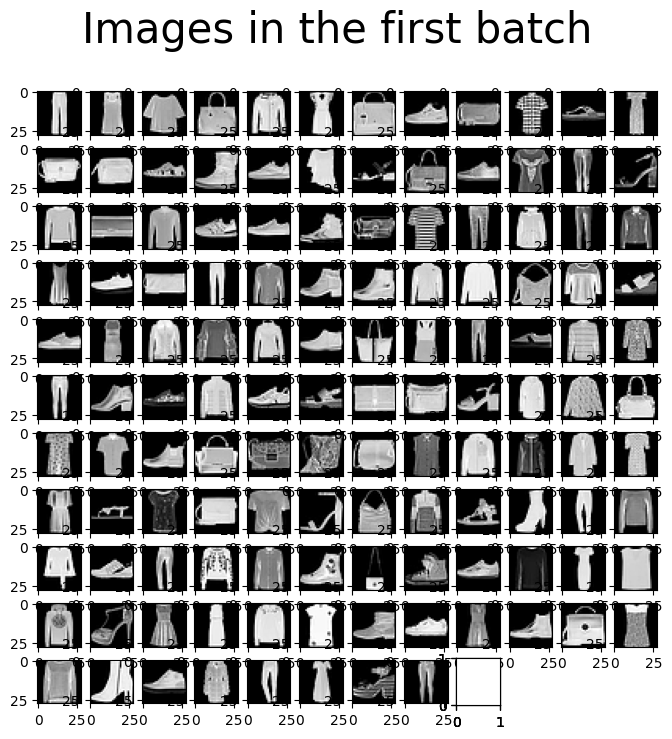

In [6]:
dataset = transform_data_for_show(FashionMNIST, store_path='../../datasets')
train_dataloader = DataLoader(dataset, batch_size=128, num_workers=0, shuffle=True)
show_first_batch(train_dataloader)

In [7]:
image_channels = next(iter(train_dataloader))[0].size()[1]
image_channels

1

# N_STEPS = 1000

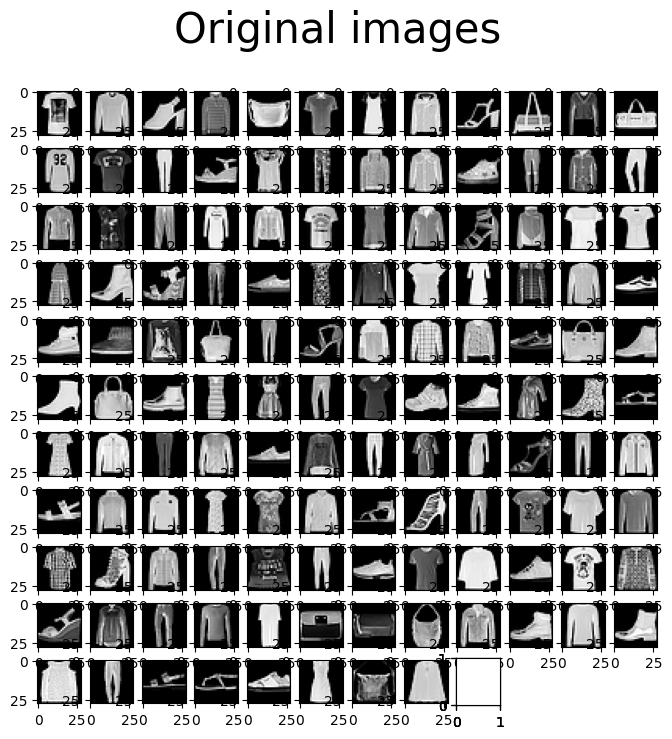

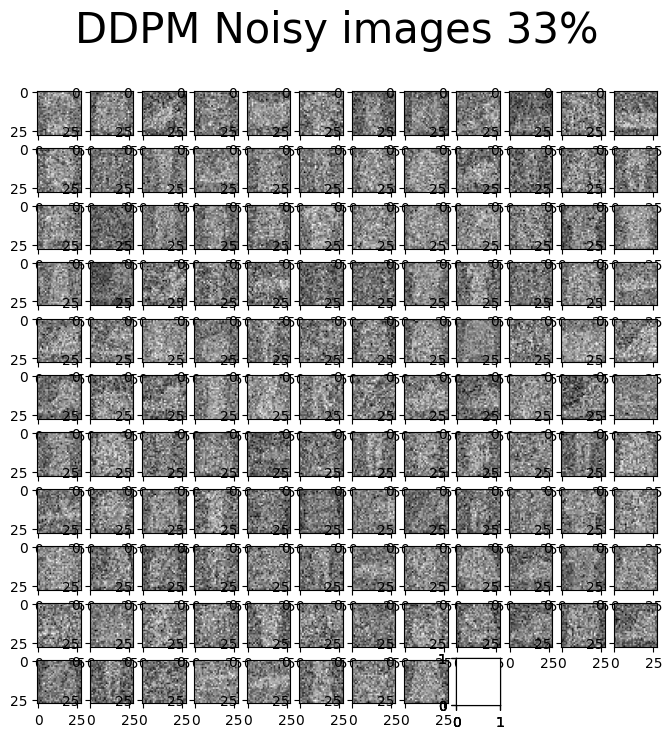

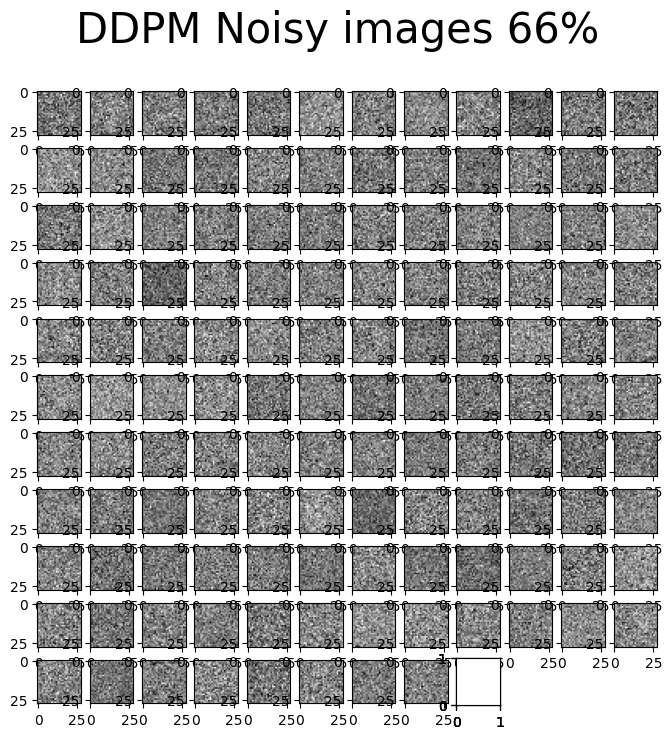

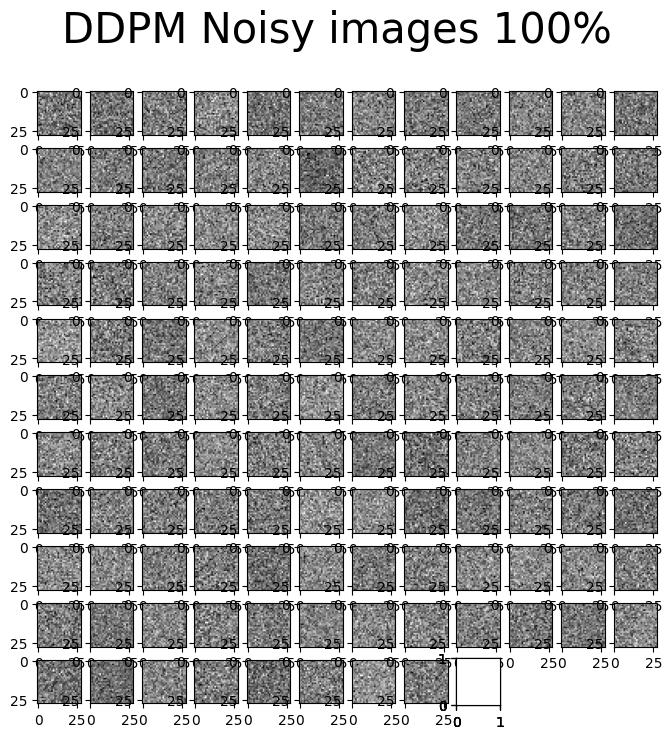

In [8]:
n_steps = 1000

ddpm = CustomDiffusionModel(MyUnet(n_steps), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=device)
show_forward(ddpm, train_dataloader, device)

### Train

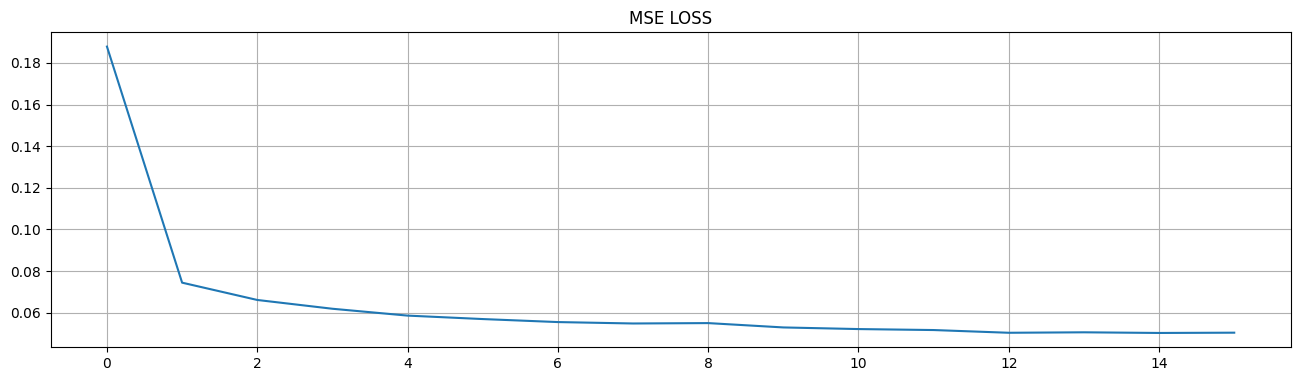

Loss at epoch 16: 0.05042


Epoch 17/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 17: 0.04886 --> Best model ever (stored)


Epoch 18/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 18: 0.04952


Epoch 19/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 19: 0.04830 --> Best model ever (stored)


Epoch 20/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 20: 0.04850


In [9]:
optimizer = torch.optim.Adam(ddpm.parameters(), lr=0.001)     
training(ddpm, train_dataloader, display=True, n_epochs=20, device=device, upset_epoch=5, optimizer=optimizer, store_path = '../../model_weights/ddpm_mnist_steps_1000.pt') 

### Test

In [10]:
store_path = '../../model_weights/ddpm_mnist_steps_1000.pt'

best_model = CustomDiffusionModel(MyUnet(n_steps), n_steps=n_steps, device=device)
best_model.load_state_dict(torch.load(store_path, map_location=device))
best_model.eval()
print("Model loaded")

Model loaded


Generating new images


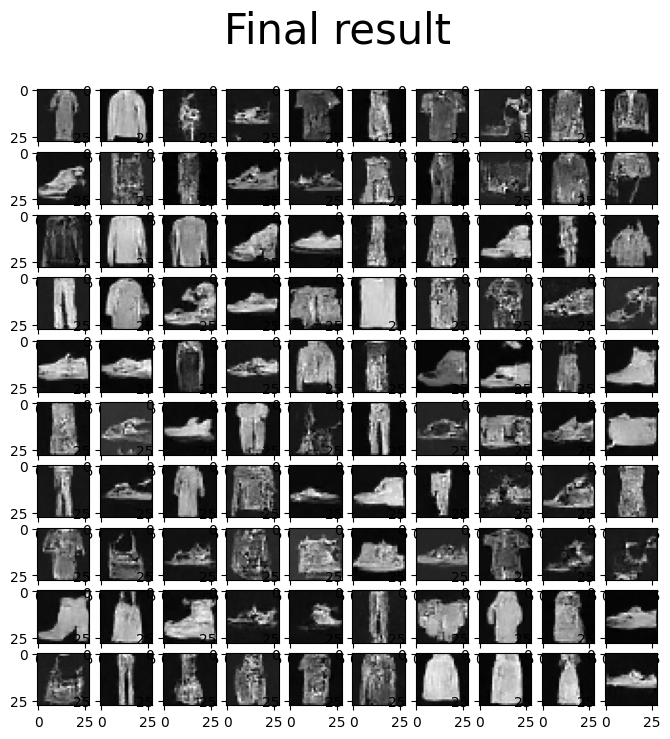

In [11]:
print("Generating new images")
generated = generate_new_images(
        best_model,
        n_samples=100,
        device=device,
        gif_name="../../pictures/mnist_1000.gif"
    )
show_images(generated, title="Final result")

### Metrics

In [12]:
print('bits_per_pixel = {}, N = 100, n_step = 1000'.format(rate_score(generated)))

bits_per_pixel = 40.157447814941406, N = 100, n_step = 1000


# N_STEPS = 500

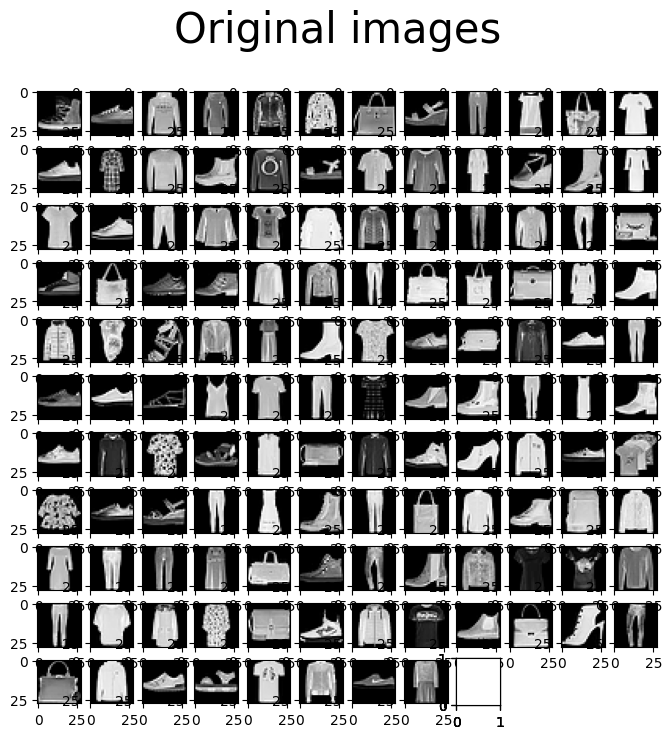

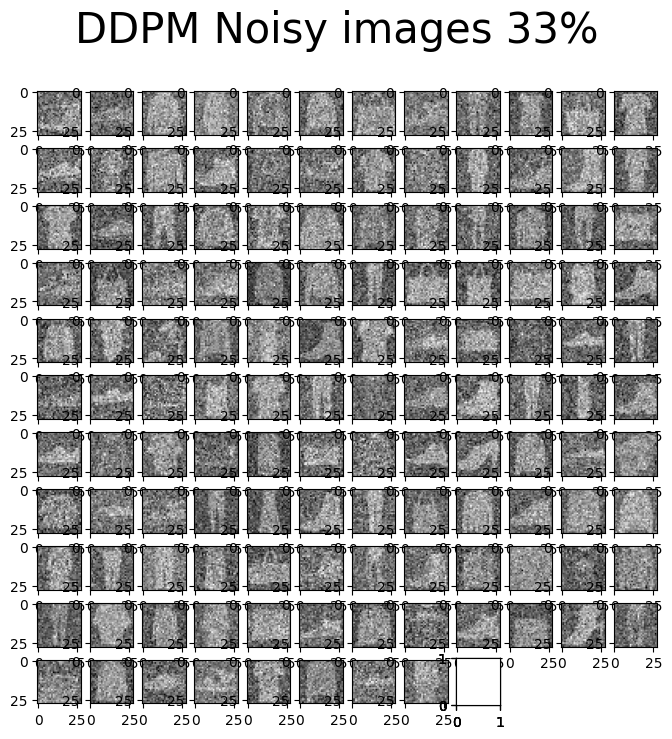

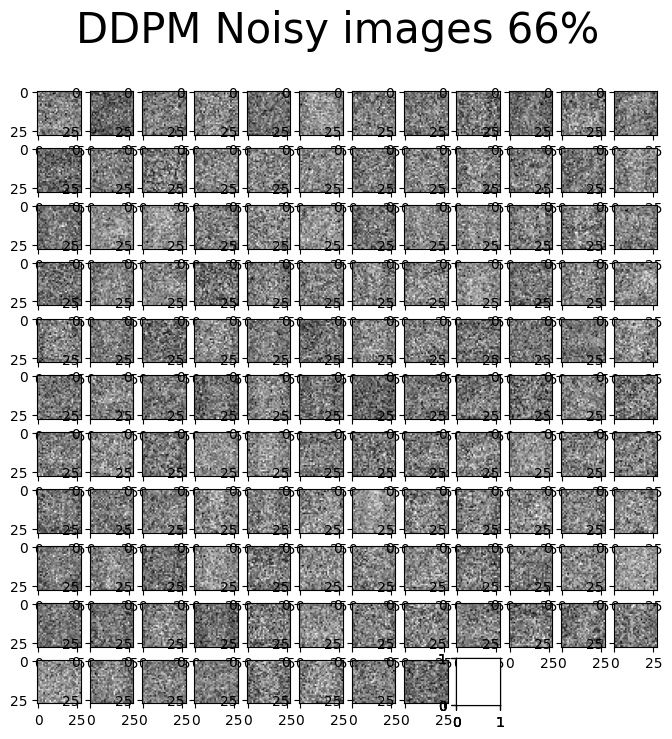

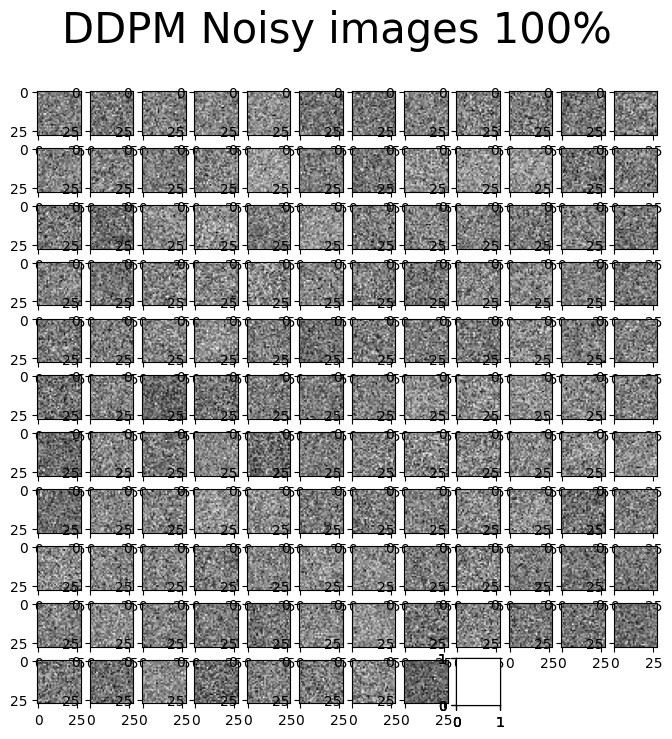

In [15]:
n_steps = 500

ddpm = CustomDiffusionModel(MyUnet(n_steps), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=device)
show_forward(ddpm, train_dataloader, device)

### Train

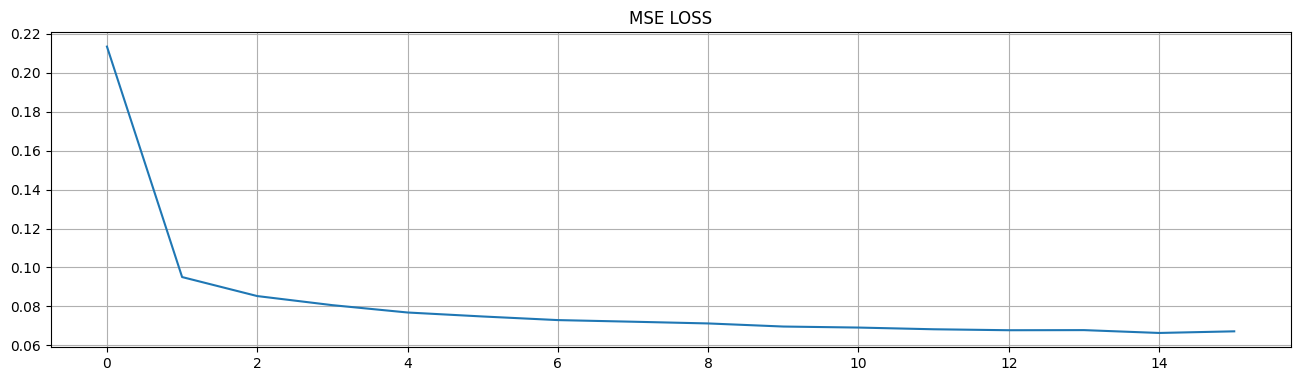

Loss at epoch 16: 0.06720


Epoch 17/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 17: 0.06641


Epoch 18/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 18: 0.06489 --> Best model ever (stored)


Epoch 19/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 19: 0.06528


Epoch 20/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 20: 0.06466 --> Best model ever (stored)


In [16]:
optimizer = torch.optim.Adam(ddpm.parameters(), lr=0.001)     
training(ddpm, train_dataloader, display=True, n_epochs=20, device=device, upset_epoch=5, optimizer=optimizer, store_path = '../../model_weights/ddpm_mnist_steps_500.pt') 

### Test

In [17]:
store_path = '../../model_weights/ddpm_mnist_steps_500.pt'

best_model = CustomDiffusionModel(MyUnet(n_steps), n_steps=n_steps, device=device)
best_model.load_state_dict(torch.load(store_path, map_location=device))
best_model.eval()
print("Model loaded")

Model loaded


Generating new images


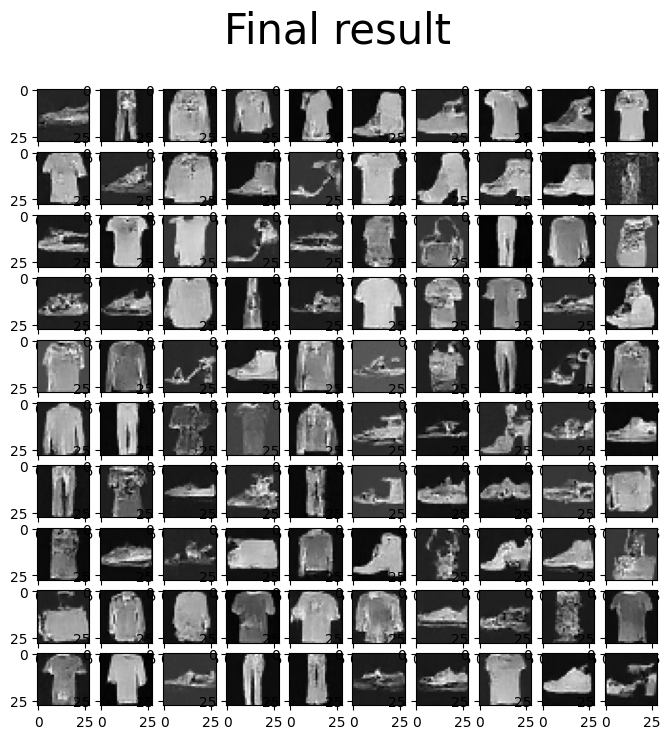

In [18]:
print("Generating new images")
generated = generate_new_images(
        best_model,
        n_samples=100,
        device=device,
        gif_name="../../pictures/mnist_500.gif"
    )
show_images(generated, title="Final result")

### Metrics

In [19]:
print('bits_per_pixel = {}, N = 100, n_step = 500'.format(rate_score(generated)))

bits_per_pixel = 7.071408271789551, N = 100, n_step = 500


# N_STEPS = 2000

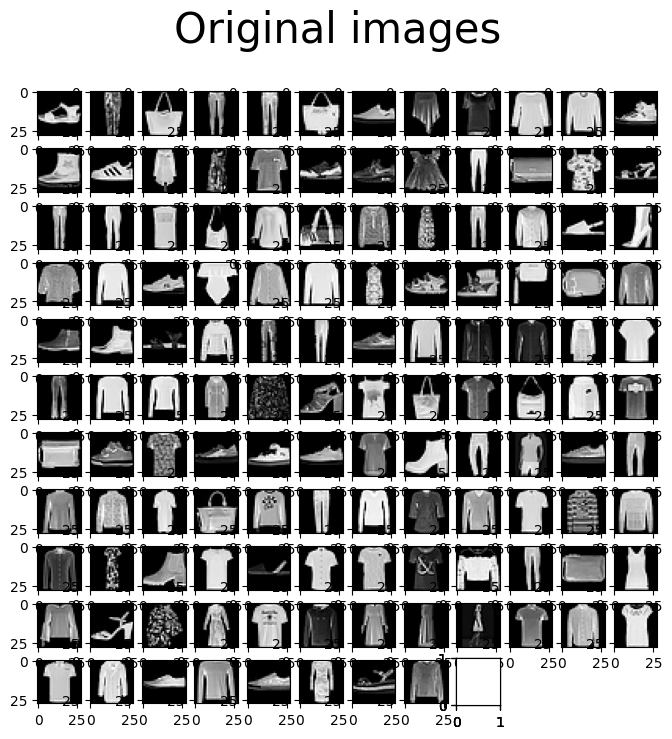

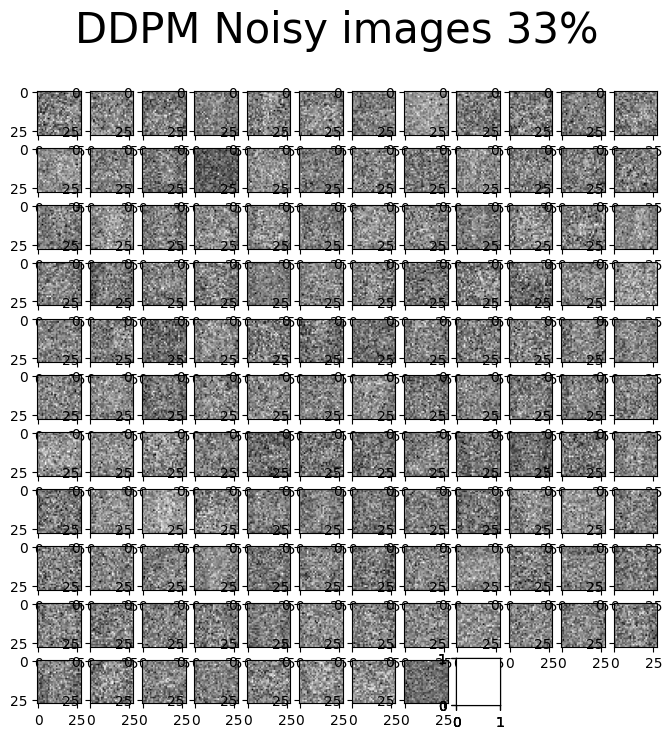

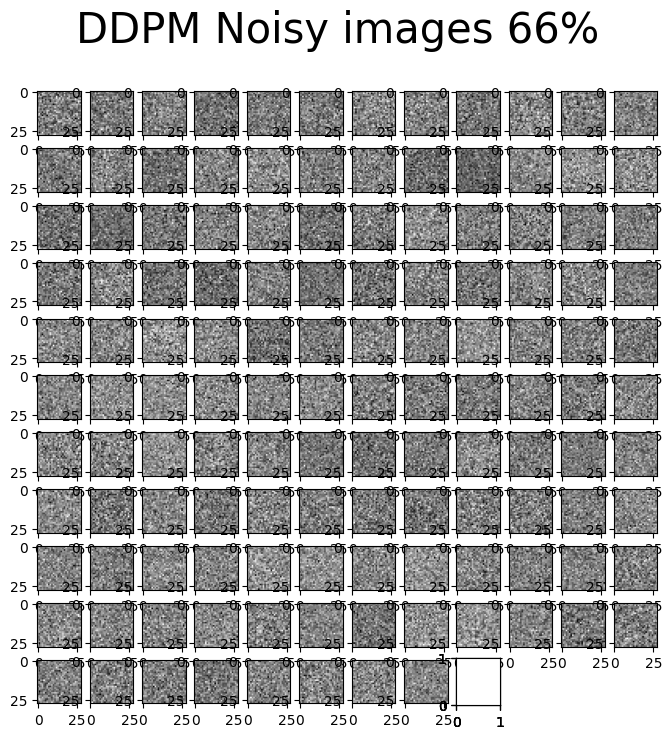

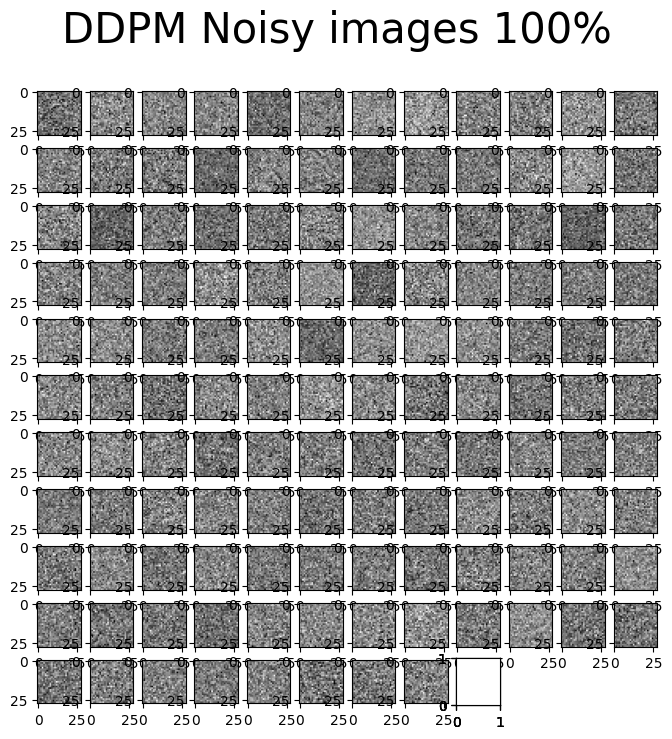

In [20]:
n_steps = 2000

ddpm = CustomDiffusionModel(MyUnet(n_steps), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=device)
show_forward(ddpm, train_dataloader, device)

### Train

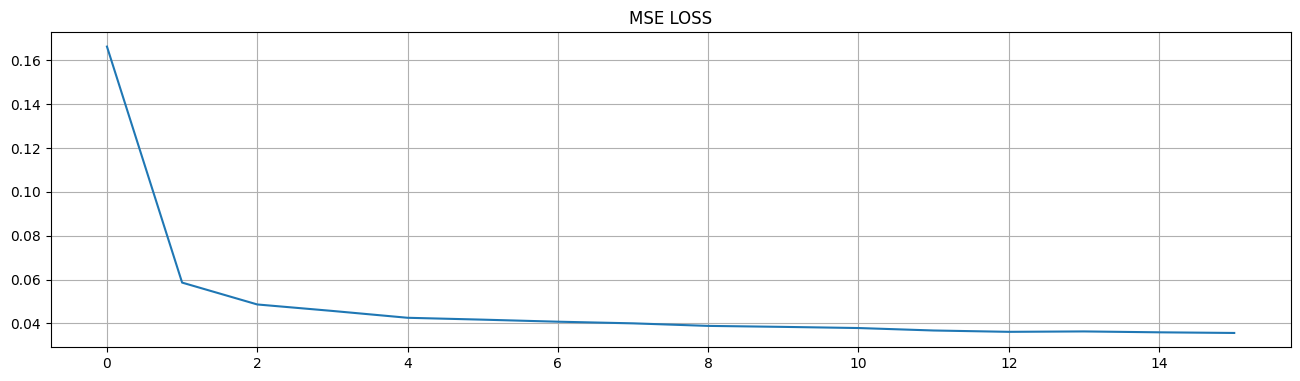

Loss at epoch 16: 0.03564 --> Best model ever (stored)


Epoch 17/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 17: 0.03496 --> Best model ever (stored)


Epoch 18/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 18: 0.03536


Epoch 19/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 19: 0.03448 --> Best model ever (stored)


Epoch 20/20:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 20: 0.03508


In [21]:
optimizer = torch.optim.Adam(ddpm.parameters(), lr=0.001)     
training(ddpm, train_dataloader, display=True, n_epochs=20, upset_epoch=5, device=device, optimizer=optimizer, store_path = '../../model_weights/ddpm_mnist_steps_2000.pt') 

### Test

In [22]:
store_path = '../../model_weights/ddpm_mnist_steps_2000.pt'

best_model = CustomDiffusionModel(MyUnet(n_steps), n_steps=n_steps, device=device)
best_model.load_state_dict(torch.load(store_path, map_location=device))
best_model.eval()
print("Model loaded")

Model loaded


Generating new images


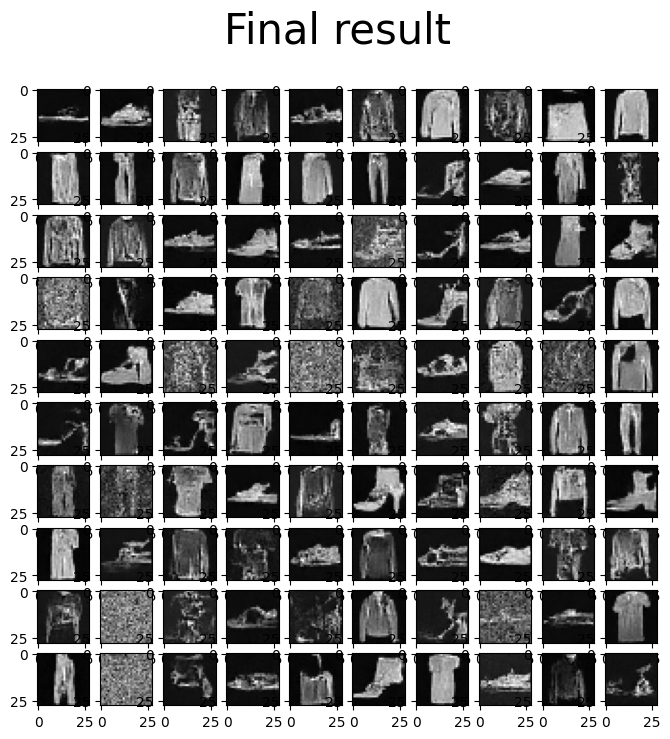

In [23]:
print("Generating new images")
generated = generate_new_images(
        best_model,
        n_samples=100,
        device=device,
        gif_name="../../pictures/mnist_2000.gif"
    )
show_images(generated, title="Final result")

### Metrics

In [24]:
print('bits_per_pixel = {}, N = 100, n_step = 2000'.format(rate_score(generated)))

bits_per_pixel = 3802.434814453125, N = 100, n_step = 2000
